Trying to make figures for Rotation Talk

In [3]:
import scdrs
import scanpy as sc
sc.set_figure_params(dpi=125)
from anndata import AnnData
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings("ignore")

In [4]:
# load adata
singlecell_object_path = "/home/cbb575_jy752/Final_project/Single-Cell_Datasets"

adata_PD = sc.read_h5ad(f"{singlecell_object_path}/PDonly_midbrain_scobject.h5ad")
adata_control = sc.read_h5ad(f"{singlecell_object_path}/controlonly_midbrain_scobject.h5ad")

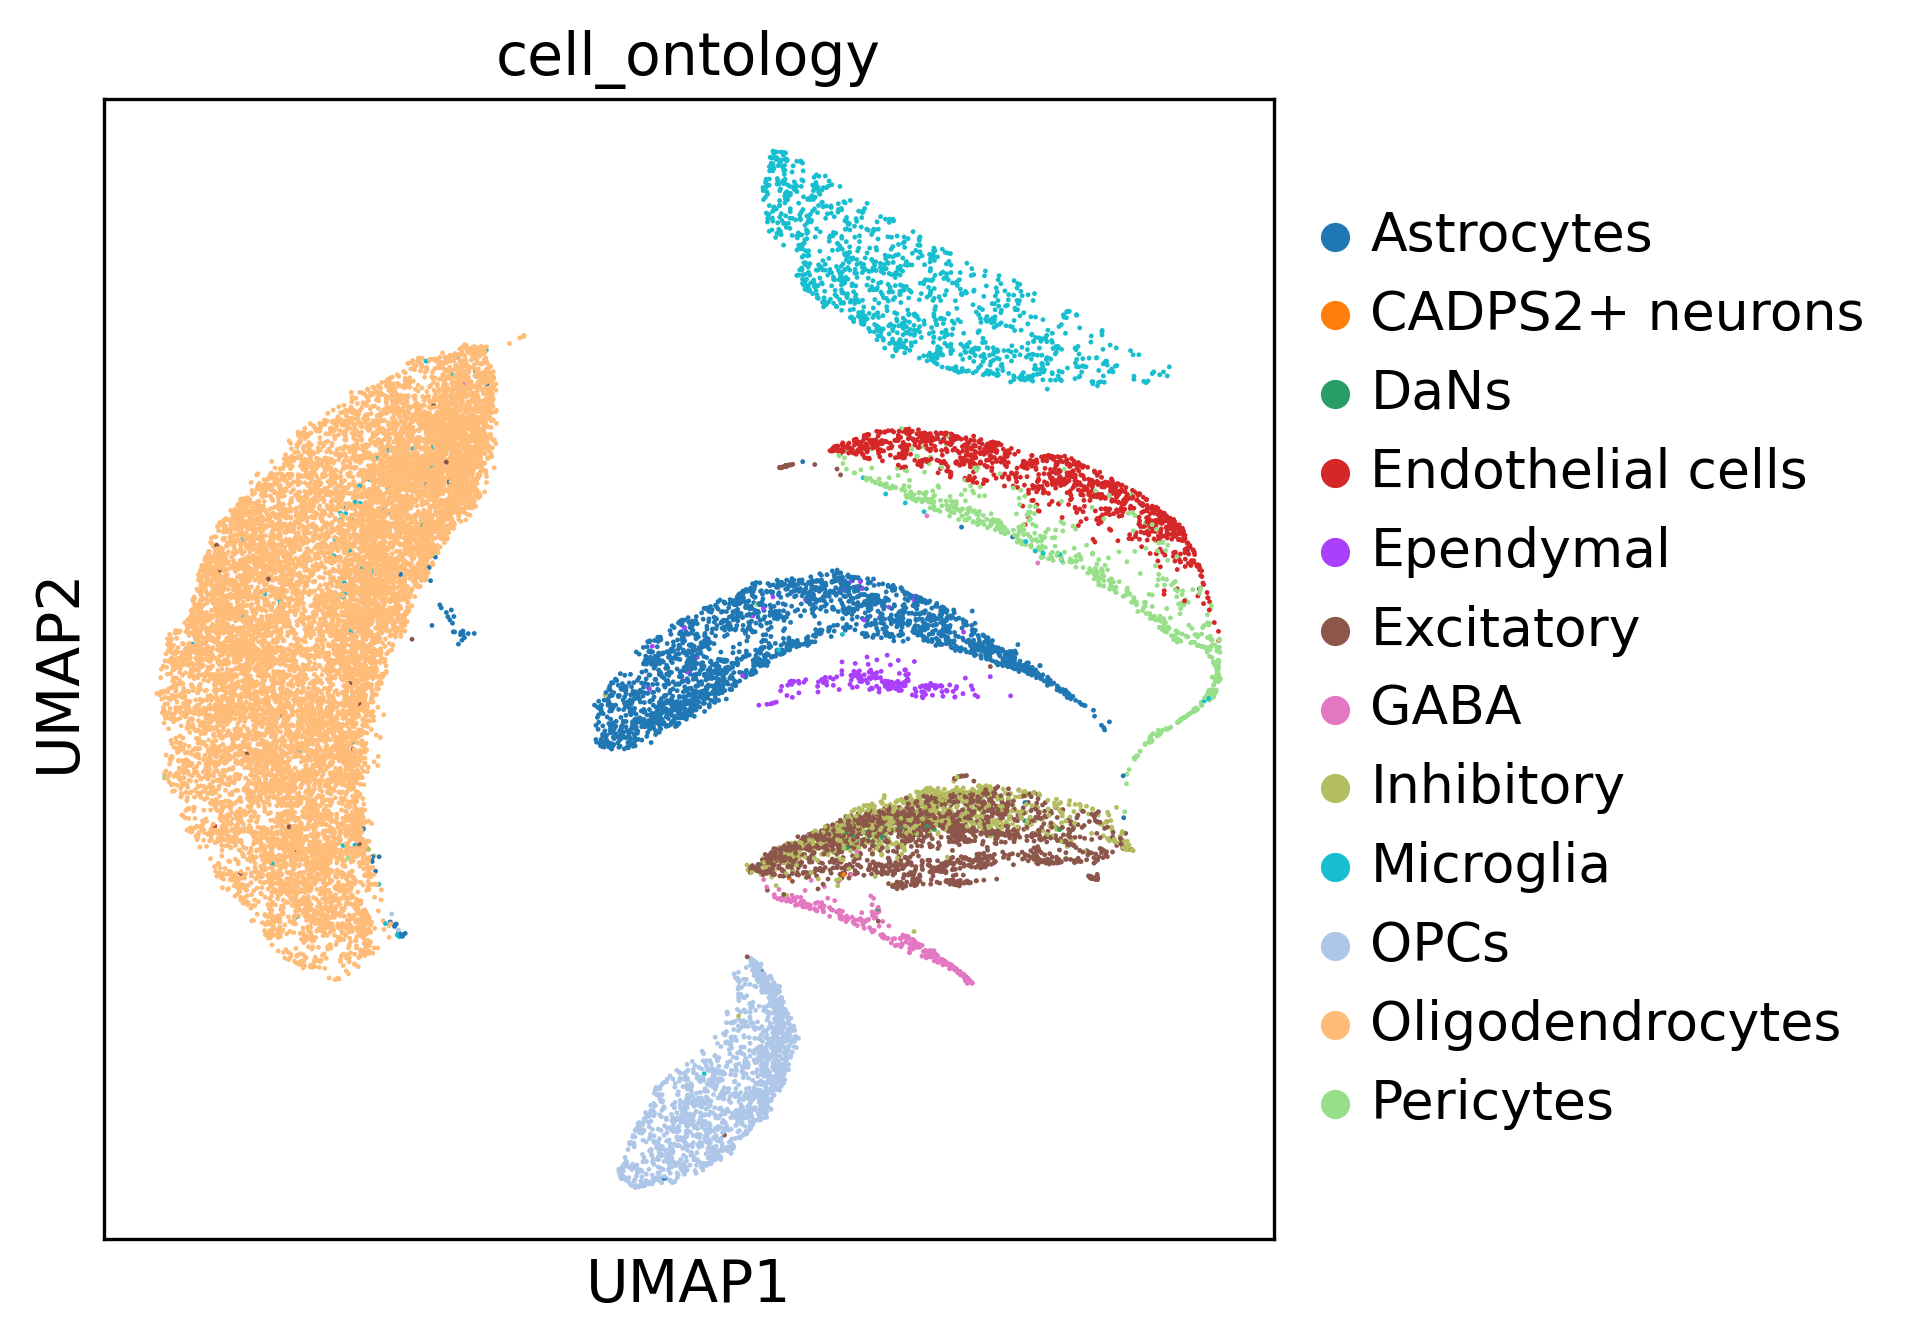

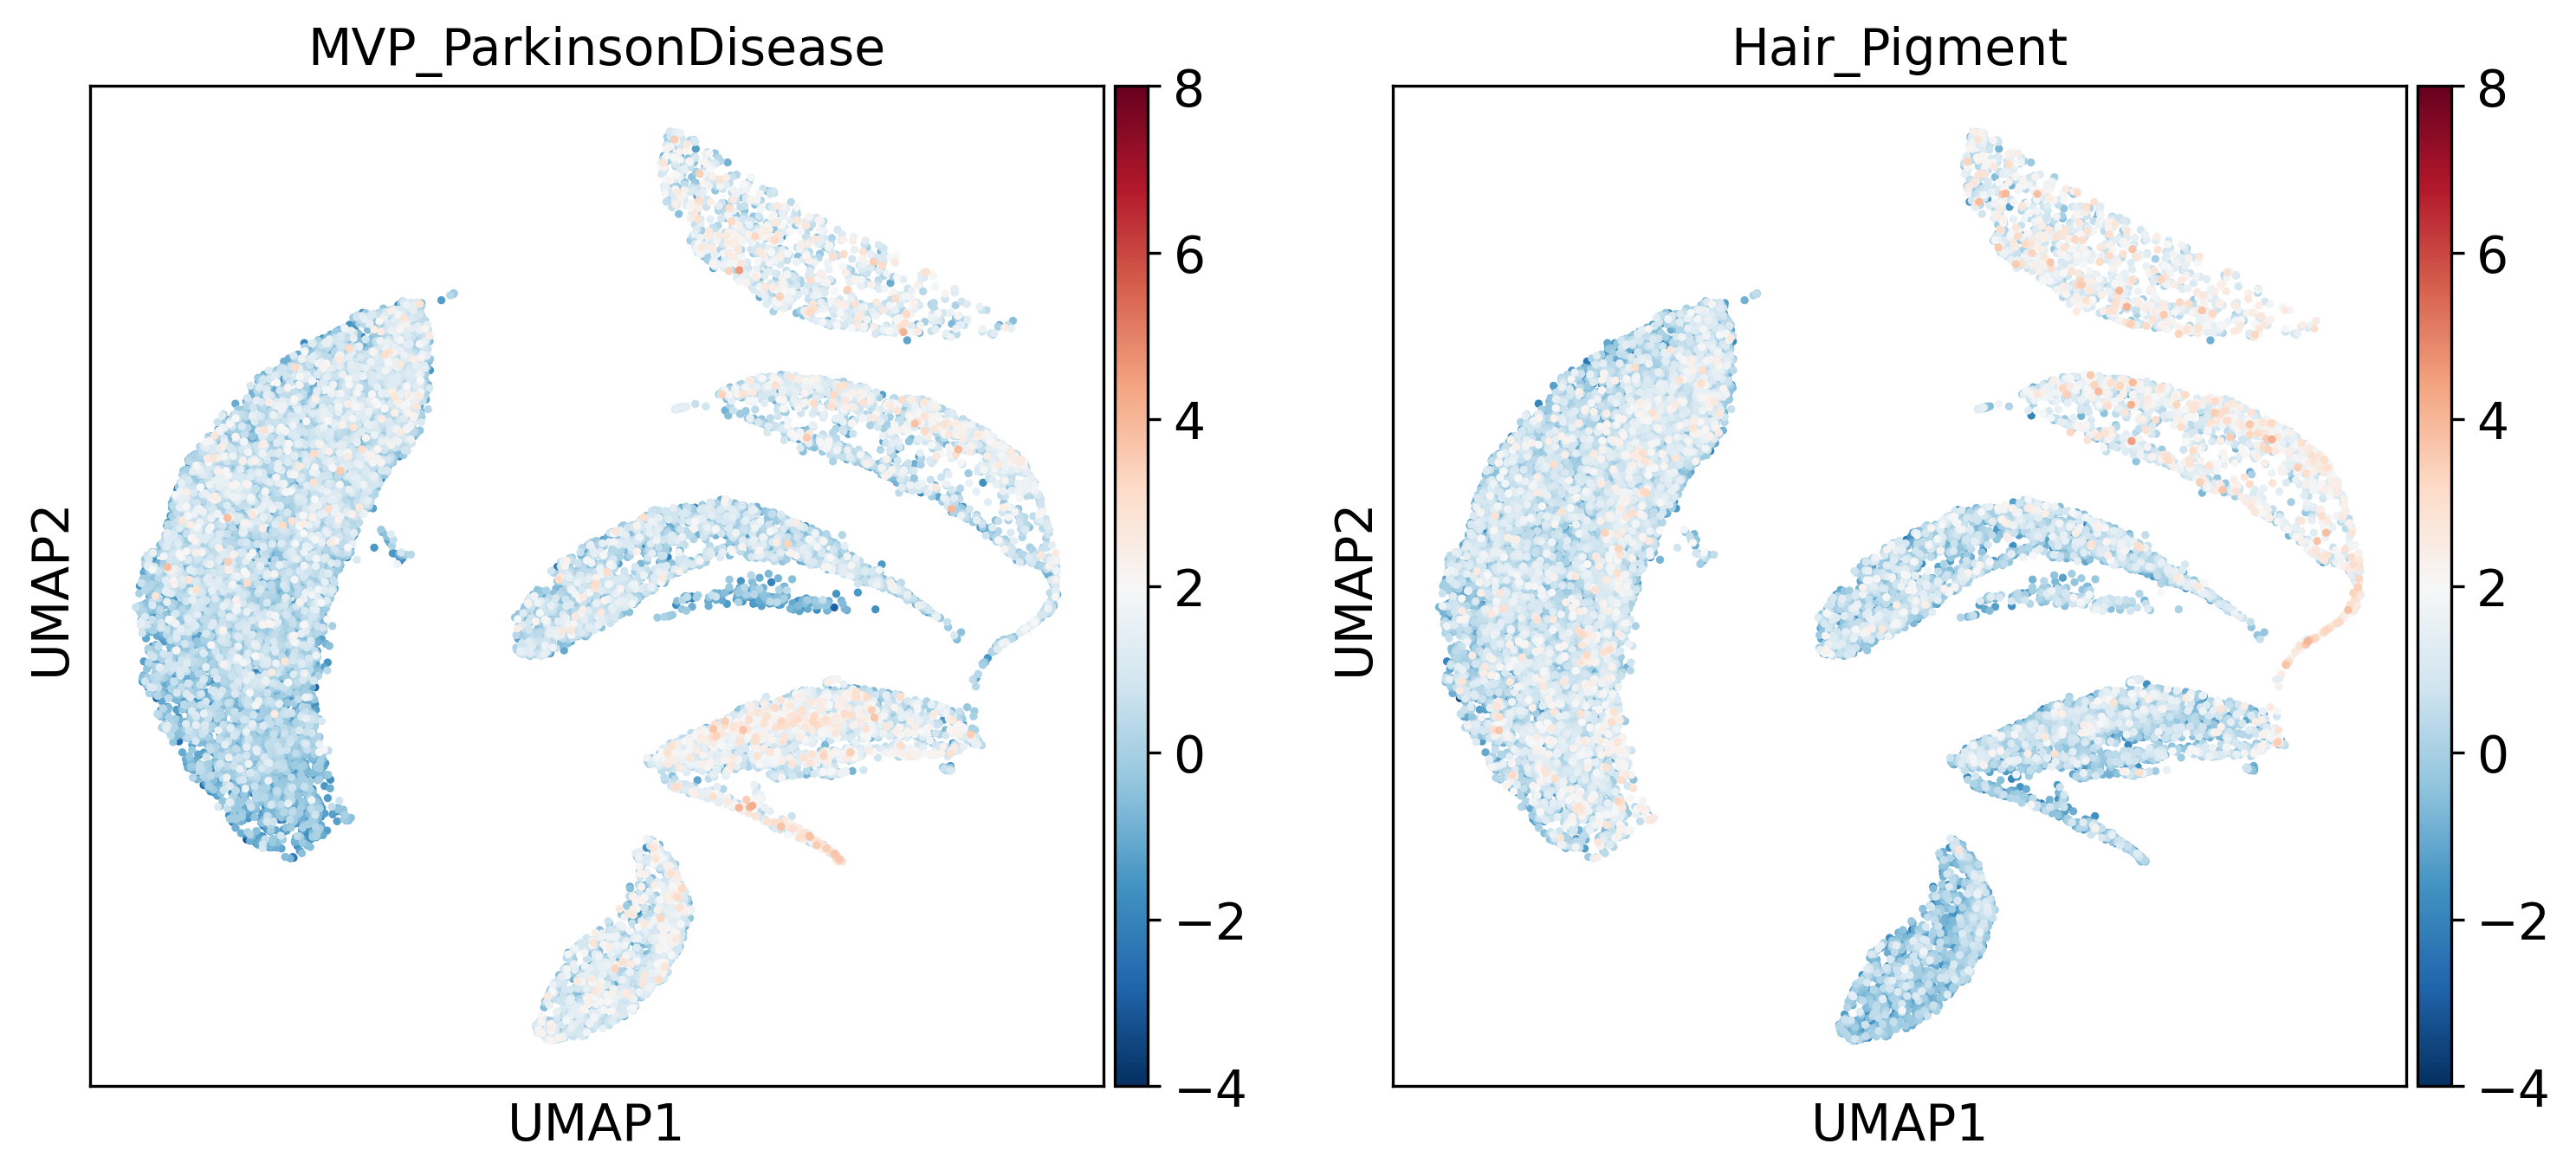

In [5]:
#Overlayyed computed cov-adjusted scDRS disease scores based on control sn-RNAseq data on the UMAP
controlSC_scores_path = "/home/cbb575_jy752/Final_project/scDRS/compute-score/control_only"
traits = ["MVP_ParkinsonDisease",
          "Hair_Pigment"]
          
dict_score = {
    trait: pd.read_csv(f"{controlSC_scores_path}/{trait}.full_score.gz", sep="\t", index_col=0)
    for trait in traits
}

for trait in dict_score:
    adata_control.obs[trait] = dict_score[trait]["norm_score"]

sc.set_figure_params(figsize=[5, 5], dpi=150)
sc.pl.umap(
    adata_control,
    color="cell_ontology",
    ncols=1,
    vmin=-4,
    vmax=8,
    color_map="RdBu_r",
    save="scDRS_midbrain_controlSC_UMAP.pdf"
)

sc.pl.umap(
    adata_control,
    color=dict_score.keys(),
    vmin=-4,
    vmax=8,
    color_map="RdBu_r",
    s=20,
    save="scDRS_PDGWAS_controlSC_NormalizedScores_UMAP.pdf"
)

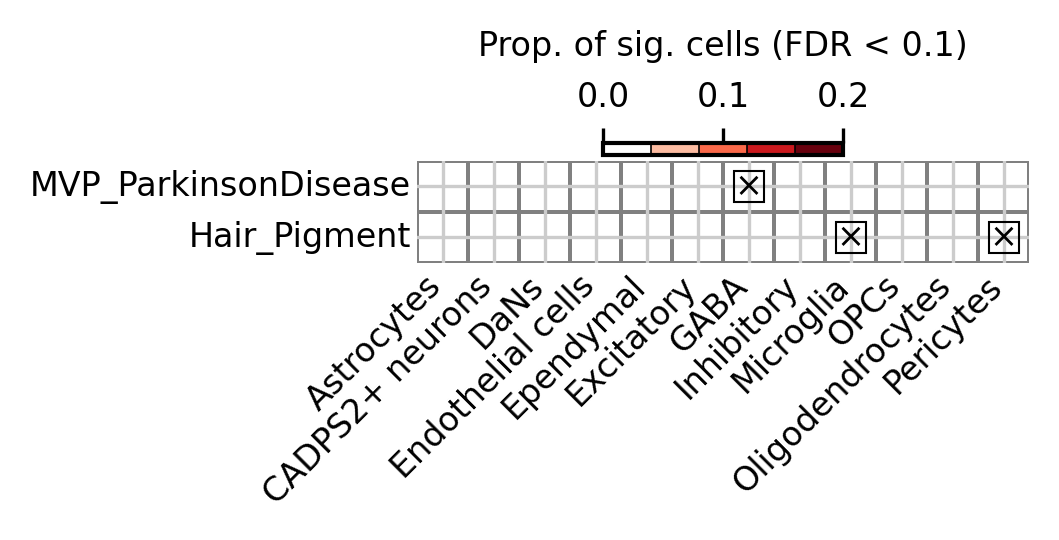

In [17]:
#Creating plot for group level analysis (control_only)
#0.1 = threshold for FDR correction of cell type-level mean association statistics
#0.1 = threshold for FDR correction of heterogeneity statistics
controlSC_grouplevelanaylsis_path = "/home/cbb575_jy752/Final_project/scDRS/compute-score/control_only/perform_downstream_group_analysis"
traits = ["MVP_ParkinsonDisease",
          "Hair_Pigment"]

dict_df_stats = {
    trait: pd.read_csv(f"{controlSC_grouplevelanaylsis_path}/{trait}.scdrs_group.cell_ontology", sep="\t", index_col=0)
    for trait in traits
}

fig, ax = scdrs.util.plot_group_stats(
    dict_df_stats=dict_df_stats,
    assoc_fdr_threshold = 0.1,
    hetero_fdr_threshold = 0.1,
    plot_kws={
        "cb_vmax": 0.2,
        "cb_fraction":0.1
    }
)
plt.savefig("scDRS_PDGWAS_controlSC_grouplevelplot_FDR_0.1.pdf",format='pdf', bbox_inches='tight')

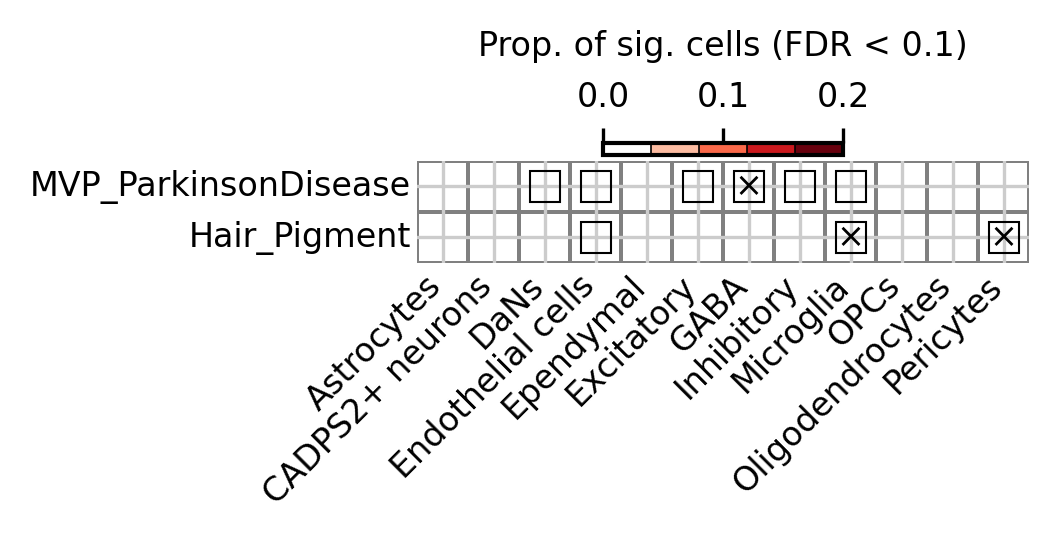

In [16]:
#Creating plot for group level analysis (control_only)
#0.2 = threshold for FDR correction of cell type-level mean association statistics
#0.2 = threshold for FDR correction of heterogeneity statistics
controlSC_grouplevelanaylsis_path = "/home/cbb575_jy752/Final_project/scDRS/compute-score/control_only/perform_downstream_group_analysis"
traits = ["MVP_ParkinsonDisease",
          "Hair_Pigment"]

dict_df_stats = {
    trait: pd.read_csv(f"{controlSC_grouplevelanaylsis_path}/{trait}.scdrs_group.cell_ontology", sep="\t", index_col=0)
    for trait in traits
}

fig, ax = scdrs.util.plot_group_stats(
    dict_df_stats=dict_df_stats,
    assoc_fdr_threshold = 0.2,
    hetero_fdr_threshold = 0.2,
    plot_kws={
        "cb_vmax": 0.2,
        "cb_fraction":0.1
    }
)
plt.savefig("scDRS_PDGWAS_controlSC_grouplevelplot_FDR_0.2.pdf",format='pdf', bbox_inches='tight')

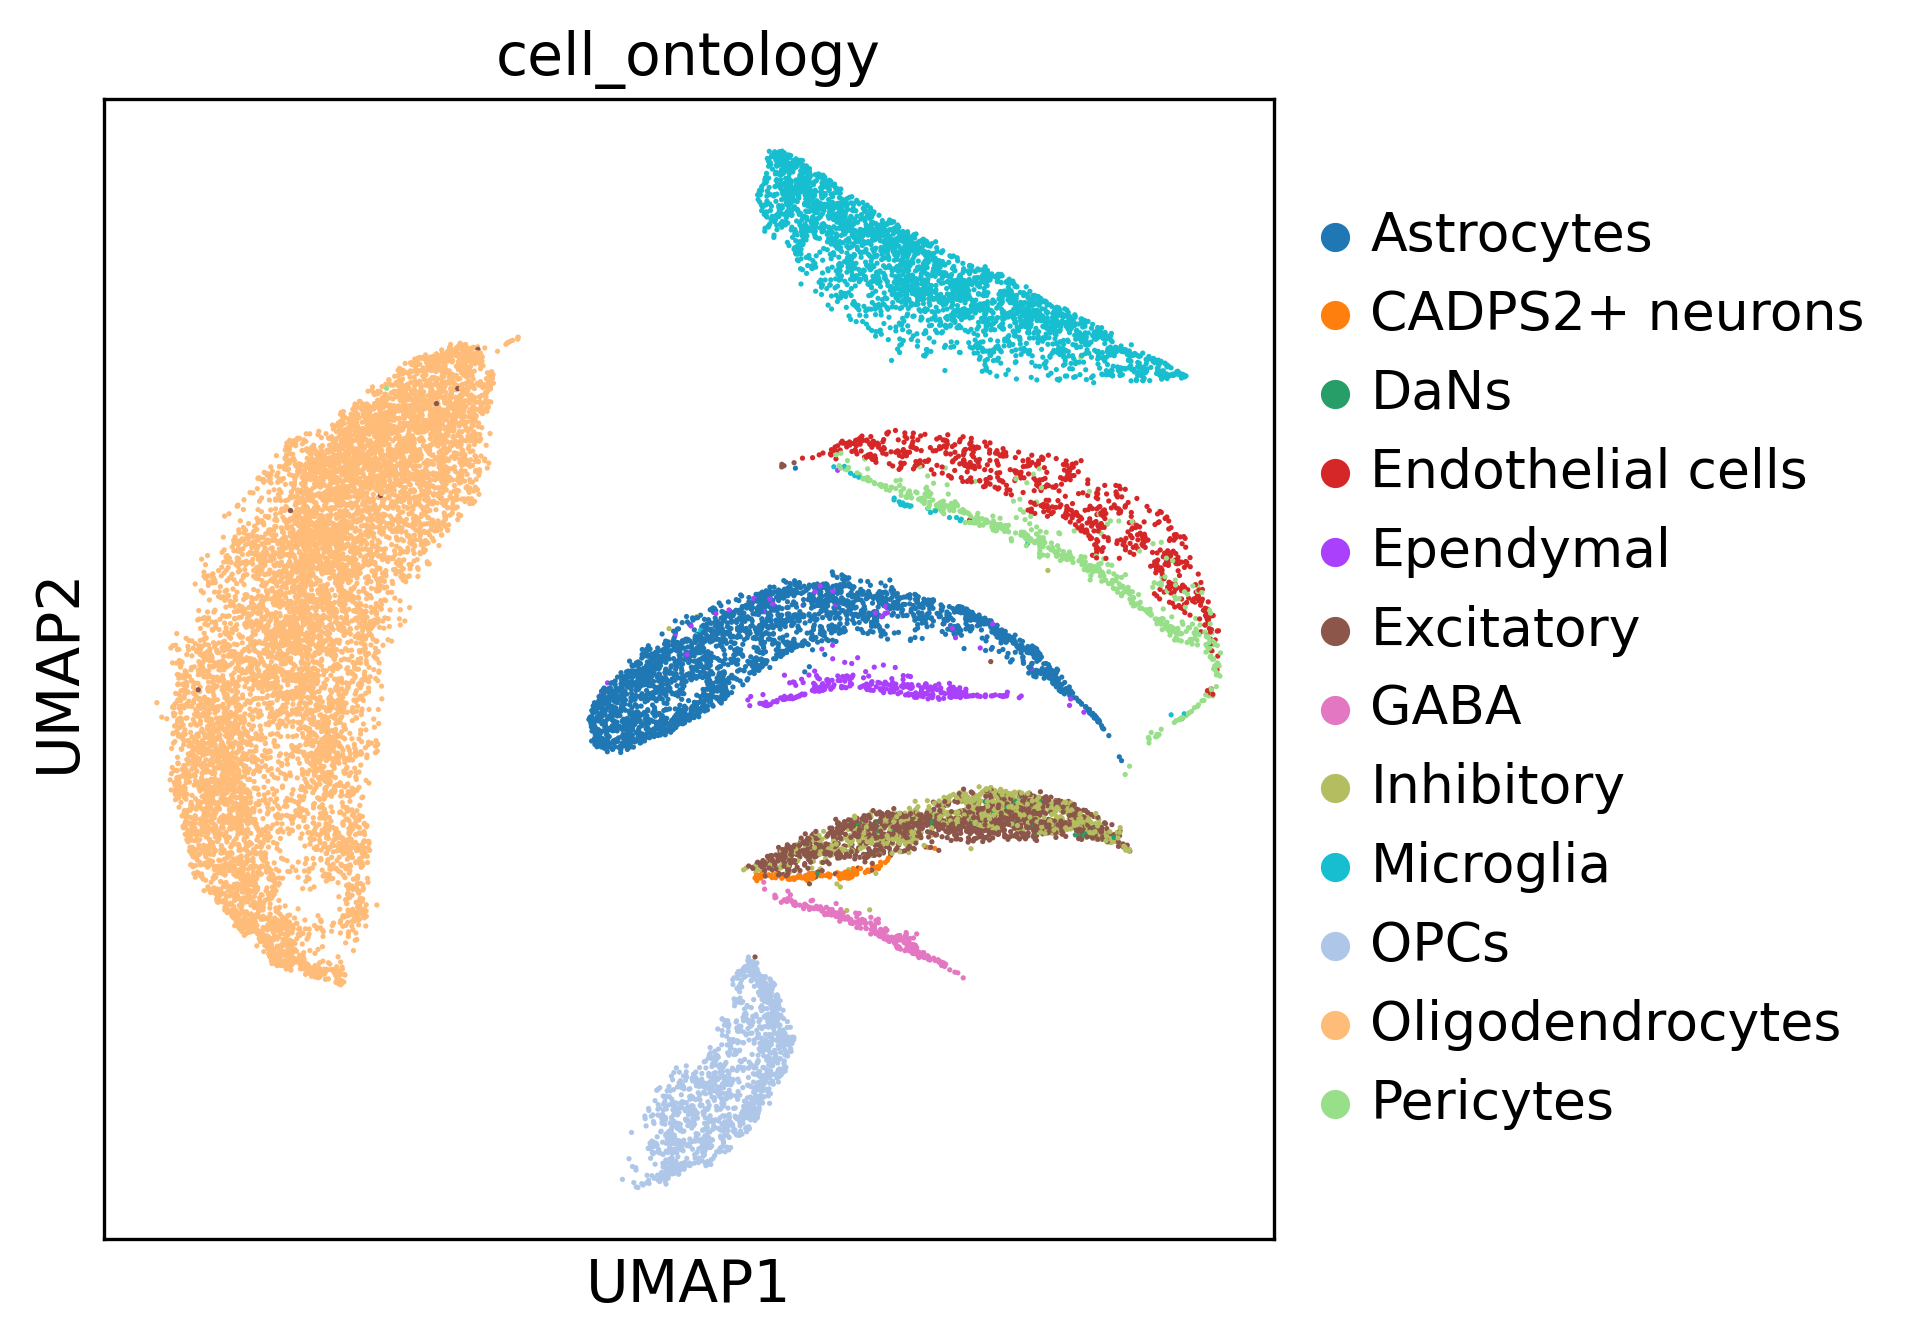

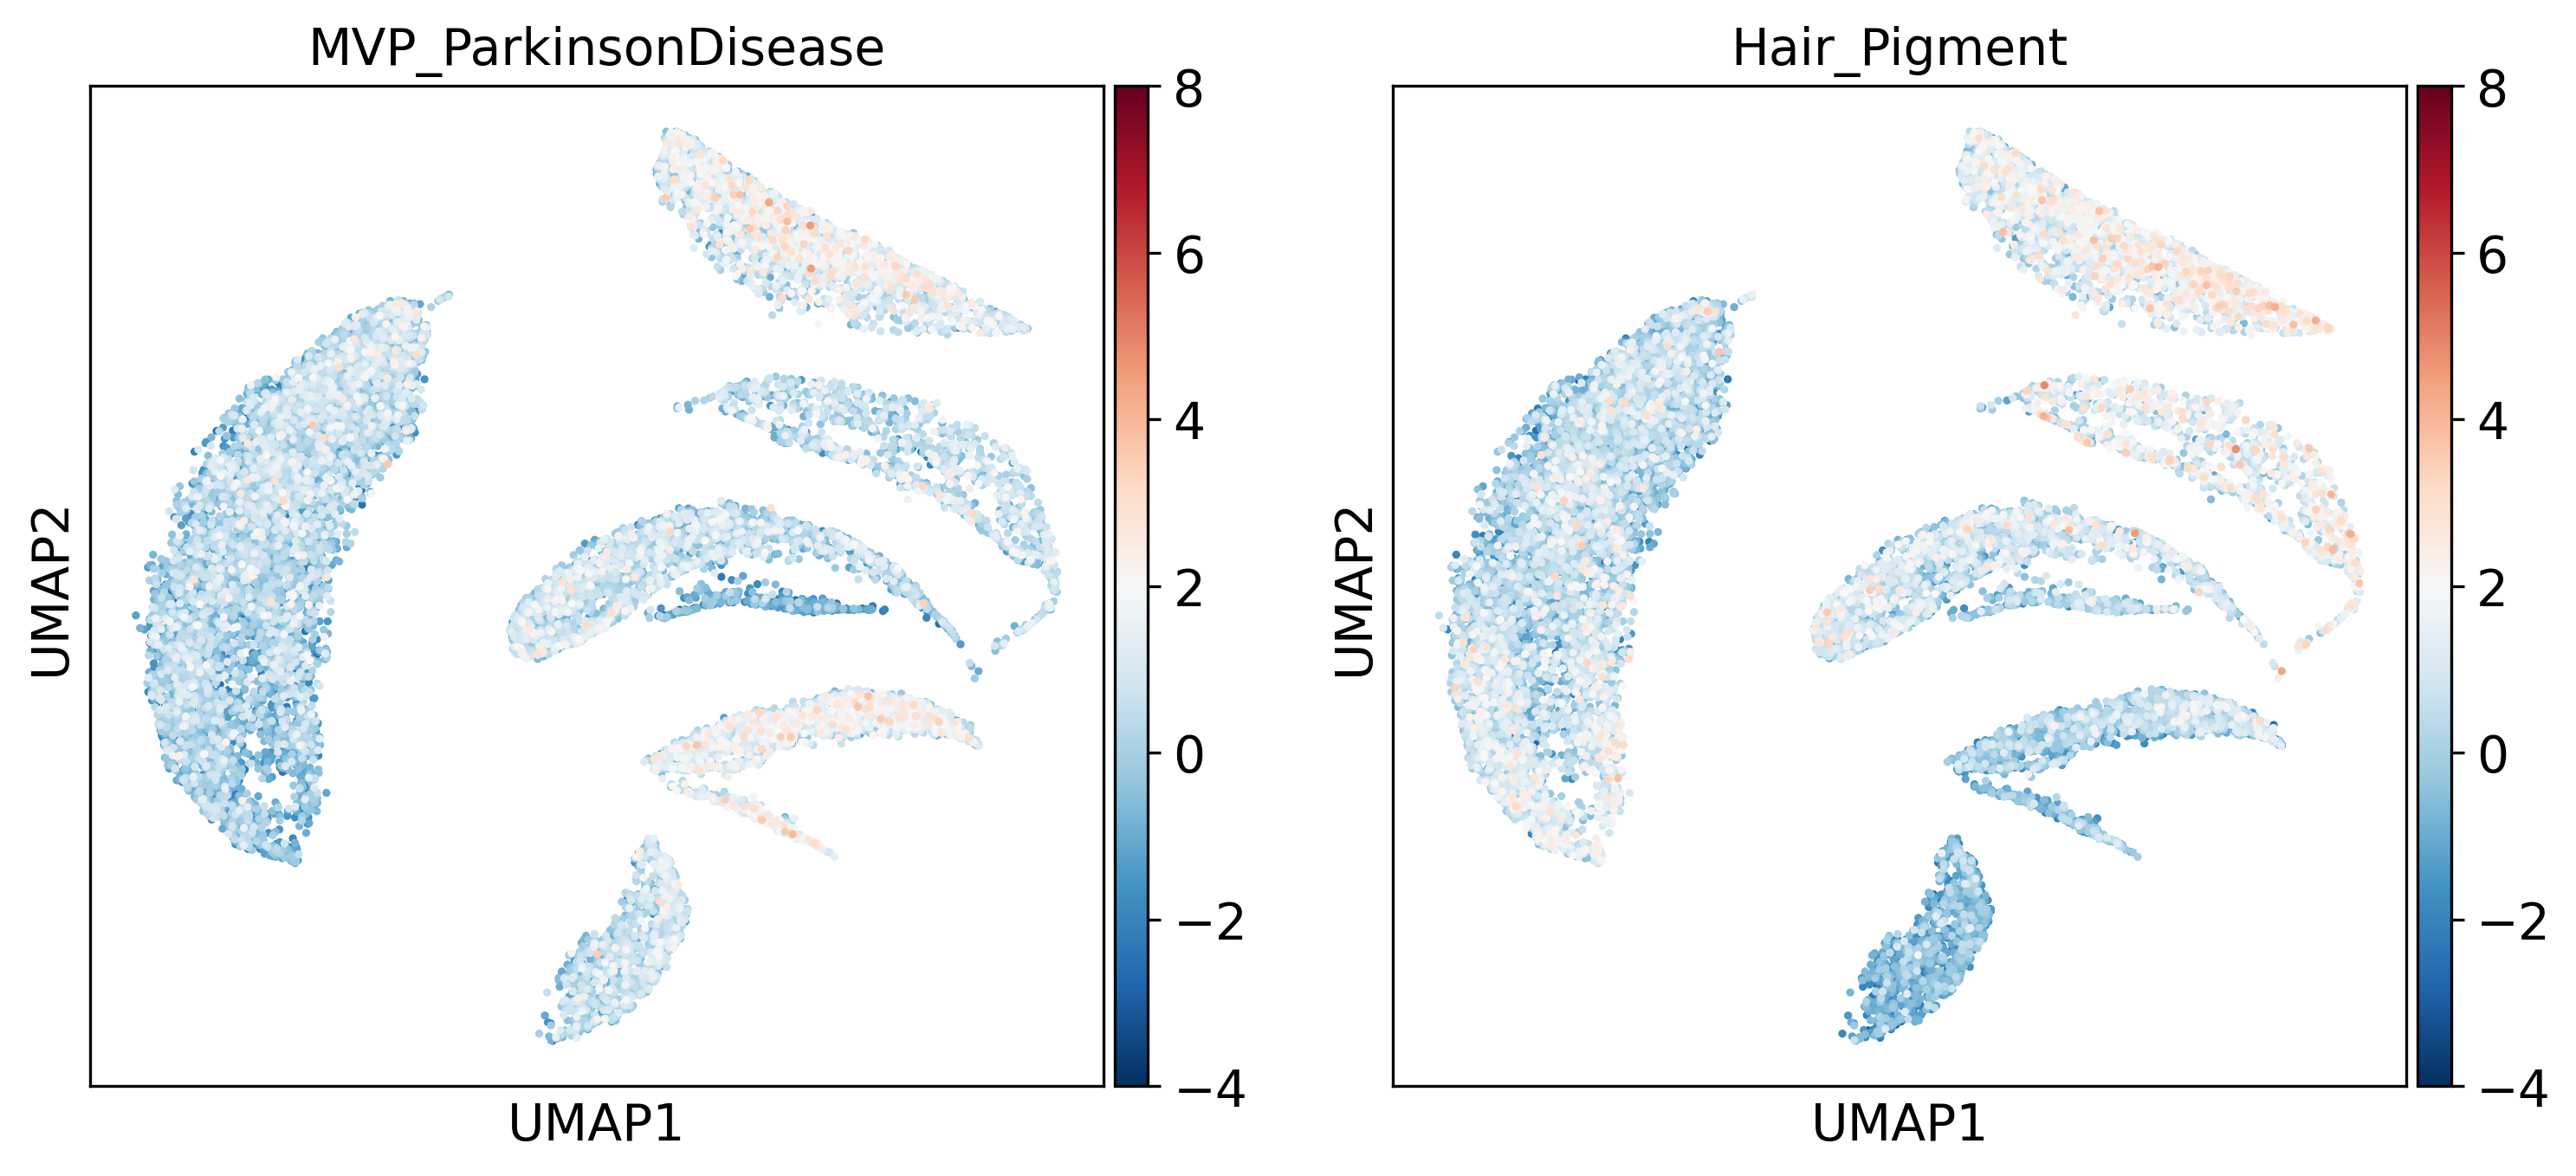

In [13]:
#Overlayyed computed cov-adjusted scDRS disease scores based on PD sn-RNAseq data on the UMAP
PDSC_scores_path = "/home/cbb575_jy752/Final_project/scDRS/compute-score/PD_only"
traits = ["MVP_ParkinsonDisease",
          "Hair_Pigment"]
          
dict_score = {
    trait: pd.read_csv(f"{PDSC_scores_path}/{trait}.full_score.gz", sep="\t", index_col=0)
    for trait in traits
}

for trait in dict_score:
    adata_PD.obs[trait] = dict_score[trait]["norm_score"]

sc.set_figure_params(figsize=[5, 5], dpi=150)
sc.pl.umap(
    adata_PD,
    color="cell_ontology",
    ncols=1,
    vmin=-4,
    vmax=8,
    color_map="RdBu_r",
    save="scDRS_midbrain_PDSC_UMAP.pdf"
)

sc.pl.umap(
    adata_PD,
    color=dict_score.keys(),
    vmin=-4,
    vmax=8,
    color_map="RdBu_r",
    s=20,
    save="scDRS_PDGWAS_PDSC_NormalizedScores_UMAP.pdf"
)

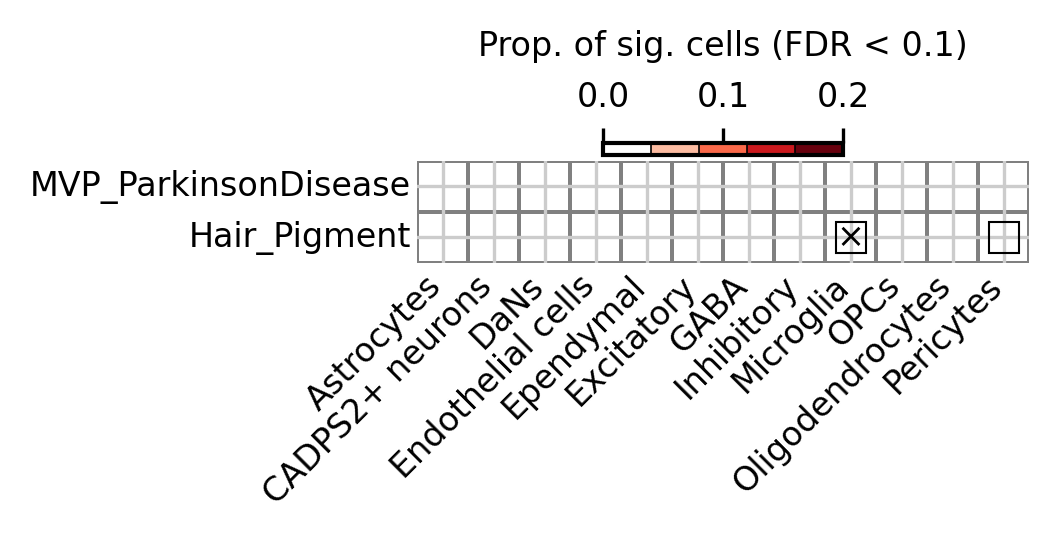

In [18]:
#Creating plot for group level analysis (PD_only)
#0.1 = threshold for FDR correction of cell type-level mean association statistics
#0.1 = threshold for FDR correction of heterogeneity statistics
PDSC_grouplevelanaylsis_path = "/home/cbb575_jy752/Final_project/scDRS/compute-score/PD_only/perform_downstream_group_analysis"
traits = ["MVP_ParkinsonDisease",
          "Hair_Pigment"]

dict_df_stats = {
    trait: pd.read_csv(f"{PDSC_grouplevelanaylsis_path}/{trait}.scdrs_group.cell_ontology", sep="\t", index_col=0)
    for trait in traits
}

fig, ax = scdrs.util.plot_group_stats(
    dict_df_stats=dict_df_stats,
    assoc_fdr_threshold = 0.1,
    hetero_fdr_threshold = 0.1,
    plot_kws={
        "cb_vmax": 0.2,
        "cb_fraction":0.1
    }
)
plt.savefig("scDRS_PDGWAS_PDSC_grouplevelplot_FDR_0.1.pdf",format='pdf', bbox_inches='tight')

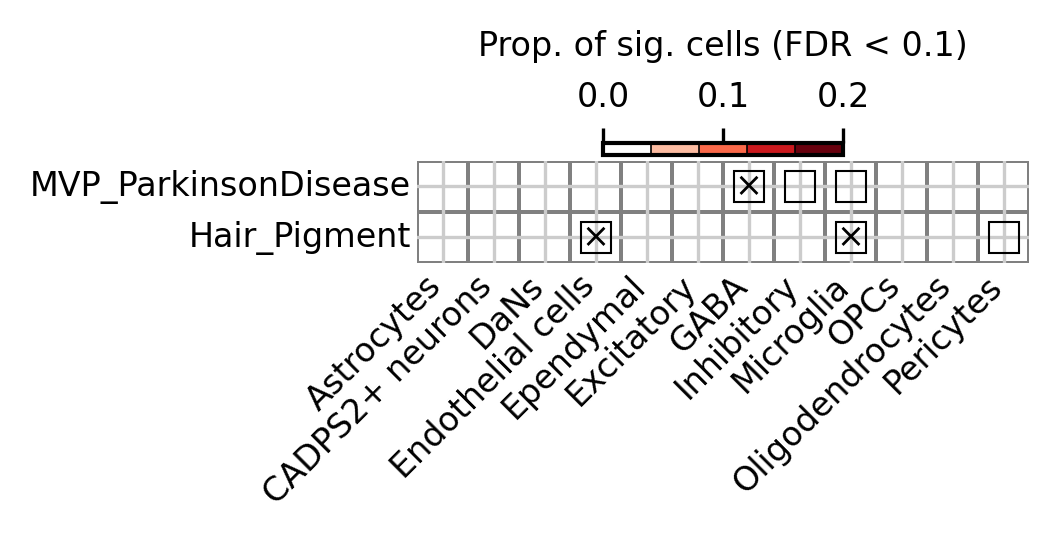

In [15]:
#Creating plot for group level analysis (PD_only)
#0.2 = threshold for FDR correction of cell type-level mean association statistics
#0.2 = threshold for FDR correction of heterogeneity statistics
PDSC_grouplevelanaylsis_path = "/home/cbb575_jy752/Final_project/scDRS/compute-score/PD_only/perform_downstream_group_analysis"
traits = ["MVP_ParkinsonDisease",
          "Hair_Pigment"]

dict_df_stats = {
    trait: pd.read_csv(f"{PDSC_grouplevelanaylsis_path}/{trait}.scdrs_group.cell_ontology", sep="\t", index_col=0)
    for trait in traits
}

fig, ax = scdrs.util.plot_group_stats(
    dict_df_stats=dict_df_stats,
    assoc_fdr_threshold = 0.2,
    hetero_fdr_threshold = 0.2,
    plot_kws={
        "cb_vmax": 0.2,
        "cb_fraction":0.1
    }
)
plt.savefig("scDRS_PDGWAS_PDSC_grouplevelplot_FDR_0.2.pdf",format='pdf', bbox_inches='tight')